In [24]:
from scipy.io import arff
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,roc_auc_score, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.preprocessing import Imputer,Normalizer,MinMaxScaler
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt

## Logistic Regression Algorithm

Sigmoid Function

$$ \frac{1}{1 - e^{-x}} $$

In [25]:
def sigmoid(X, Q):
    #Z = np.dot(X, Q)
    Z = X @ Q
    return 1 / (1 + np.exp(-Z))

Cost function

$$ -ylog(\hat y) - ((1-y)log(1-\hat y)) $$

In [26]:
def cost_function(actual_y, predicted_y):
    #return -np.dot(actual_y,np.log(predicted_y)) - (np.dot((1-actual_y),np.log(1-predicted_y))).mean()
    return -((actual_y * np.log(predicted_y + 0.001)) - ((1-actual_y) * np.log(1-predicted_y + 0.001))).mean()

Derivate of cost function

$$ (\hat y - y)x $$

In [27]:
def gradient(predicted_y, actual_y, x):
    return np.dot((predicted_y - actual_y),x) / actual_y.shape[0]

#### Logistic Regression function using Gradient Descent

In [28]:
class CustomLogisticRegression(BaseEstimator, ClassifierMixin):
    
    def fit(self,X,y=None):

        Y = y.T
        self.weights = np.zeros(X.shape[1])

        alpha = 0.01
        error_threshold = 0.01
        count=0

        while count < 10000:
            count += 1
            Predicted = sigmoid(X,self.weights)
            #print("Predicted: {}".format(Predicted))
            cost = cost_function(Y,Predicted)
            #print("Cost: {}".format(cost))
            error = gradient(Predicted, Y, X)
            #print("Error: {}".format(error))
            self.weights -= alpha * error
            #print("Weights: {}".format(self.weights))
            
            if (all(abs(i) < error_threshold for i in error)):
                break
            
        print("Training complete. Number of epochs: {}".format(count))
        print(self.weights)

    def predict(self,X,sigmoid_threshold):        
    
        predicted = sigmoid(X,self.weights)
        return predicted
    
    def predict_proba(self,X):        
    
        predicted = sigmoid(X,self.weights)
        return predicted

### Pre-Processing and Scoring Functions

#### Loading data and transforming from arff to dataframe

In [29]:
def load_data(file_location):
    raw_data, meta = arff.loadarff(file_location)
    data = pd.DataFrame(raw_data)
    return data

#### Using Recursive Feature Selection (RFE) to select the best k features

In [30]:
def feature_selection(X,y):
    selector = RFE(slr, 20)
    fit = selector.fit(X,y)
    
    selectedFeaturesStr = ""
    selectedFeatures = selector.support_
    
    for i in range(0, len(X.columns)):
        if (selectedFeatures[i] == True):
            selectedFeaturesStr += X.columns[i] + ", "
    
    print("Selected Features: ")
    print(selectedFeaturesStr)
    
    transformed_input = fit.transform(X_train)
    tranformed_test = fit.transform(X_test)
    
    return transformed_input, tranformed_test

#### Using SMOTE to generate synthetic samples and balance out the classes

In [31]:
def smote(X, y):
    
    #print("\n\nClass differences before and after SMOTE:")
    
    #Class amount before SMOTE
    majority_class = input.loc[input['class'] == 0]
    minority_class = input.loc[input['class'] == 1]
    print("Class 0: {}".format(majority_class.shape))
    print("Class 1: {}".format(minority_class.shape))
    
    #Generate synthetic samples
    sm = SMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_sample(transformed_input, y_train)
    
    #Class amount after SMOTE
    majority_class = y_train_res[y_train_res == 0]
    minority_class = y_train_res[y_train_res == 1]
    print("Class 0: {}".format(majority_class.shape))
    print("Class 1: {}".format(minority_class.shape))
    
    return X_train_res, y_train_res

#### Using the ROC Area Under Curve (AUC) to score the predictions

In [32]:
def roc_score(y_test, predictions):

    score = roc_auc_score(y_test, predictions)
    print("ROC AUC score: {}".format(score))
    
    fpr, tpr, _ = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    print("ROC AUC score: {}".format(roc_auc))
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    return score

#### Calculate the results and draw a Confusion Matrix

In [33]:
def calc_results(predicted, actual):

    result = pd.DataFrame(np.vstack((predicted, actual)).T,columns=['Predicted Outcomes','Actual Outcomes'])
    result.head(1000)

    score = roc_score(result['Actual Outcomes'],result['Predicted Outcomes'])

    sigmoid_threshold = 0.55
    result['Predicted Outcomes'][result['Predicted Outcomes'] >= sigmoid_threshold] = 1
    result['Predicted Outcomes'][result['Predicted Outcomes'] < sigmoid_threshold] = 0

    conf_matrix = confusion_matrix(result['Actual Outcomes'], result['Predicted Outcomes'])
    print(conf_matrix)
    
    return score

## Training the algorithm for each year and testing it against unseen data



 *****************************
*****  Year 1  *****
*****************************



 > Epoch 0
Selected Features: 
Attr1, Attr3, Attr6, Attr7, Attr11, Attr13, Attr14, Attr18, Attr19, Attr24, Attr26, Attr33, Attr38, Attr48, Attr49, Attr51, Attr52, Attr56, Attr58, Attr63, 
Class 0: (6756, 65)
Class 1: (271, 65)
Class 0: (4723,)
Class 1: (4723,)
Training complete. Number of epochs: 2454
[-0.17174063 -0.27409485 -0.20467316 -0.1731404   0.02691013 -0.03956273
 -0.1731404  -0.1731404   0.00933919 -0.41304643 -0.2070143   0.59669706
 -0.35487908 -0.03158468  0.19573846  0.43546693 -0.06496134  0.06722665
  0.18855579 -0.56416267]

 Custom LR Results:
ROC AUC score: 0.6972486861521733
ROC AUC score: 0.6972486861521733


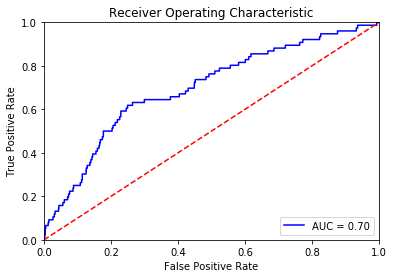

[[1555  478]
 [  31   45]]

 SkLearn LR Results:
ROC AUC score: 0.7636174178683305
ROC AUC score: 0.7636174178683305


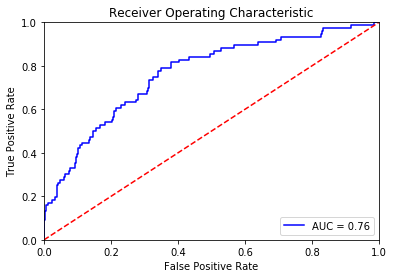

[[1606  427]
 [  32   44]]


 > Epoch 1
Selected Features: 
Attr8, Attr9, Attr10, Attr12, Attr16, Attr17, Attr20, Attr26, Attr28, Attr29, Attr32, Attr33, Attr36, Attr38, Attr44, Attr47, Attr57, Attr61, Attr62, Attr63, 
Class 0: (6756, 65)
Class 1: (271, 65)
Class 0: (4740,)
Class 1: (4740,)
Training complete. Number of epochs: 10000
[ -3.42254126  -1.60051098  -4.71441592  -3.28732552  -2.3744707
  13.45492373   6.50668514  -2.84771732   0.26484229  54.92472978
   7.30438999   3.79549313   3.64894273  -3.54798055 -22.84111122
  -9.61890533  -5.49841583  -3.77172775 -19.83994447  -4.32811093]

 Custom LR Results:
ROC AUC score: 0.5048749786653012
ROC AUC score: 0.5048749786653012


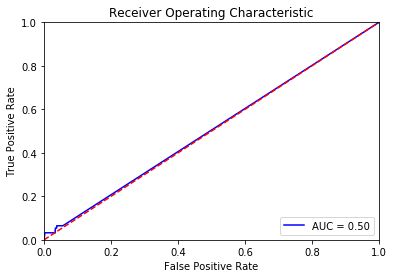

[[2010    6]
 [  90    3]]

 SkLearn LR Results:
ROC AUC score: 0.6484521676053934
ROC AUC score: 0.6484521676053934


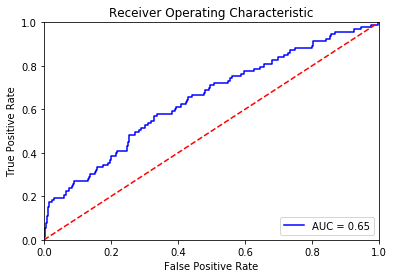

[[1923   93]
 [  75   18]]


 > Epoch 2
Selected Features: 
Attr2, Attr3, Attr6, Attr7, Attr9, Attr10, Attr14, Attr18, Attr24, Attr25, Attr26, Attr29, Attr33, Attr34, Attr36, Attr38, Attr41, Attr51, Attr57, Attr63, 
Class 0: (6756, 65)
Class 1: (271, 65)
Class 0: (4727,)
Class 1: (4727,)
Training complete. Number of epochs: 6765
[ 0.40902016 -0.35524734 -0.28440721 -0.24967812 -0.25503492 -0.22374813
 -0.24967812 -0.24967812 -1.01732634 -0.04420667  0.17928467  0.01263566
  0.23441437  0.06340423  0.29035068 -0.20508893 -0.16501885  0.22077157
 -0.04934124 -0.27945854]

 Custom LR Results:
ROC AUC score: 0.7426010349926071
ROC AUC score: 0.7426010349926071


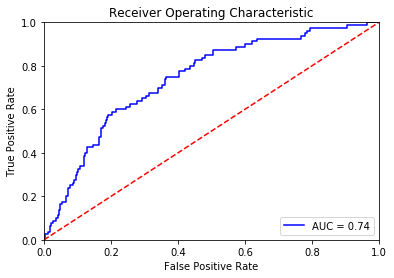

[[1616  413]
 [  33   47]]

 SkLearn LR Results:
ROC AUC score: 0.7540229176934451
ROC AUC score: 0.7540229176934451


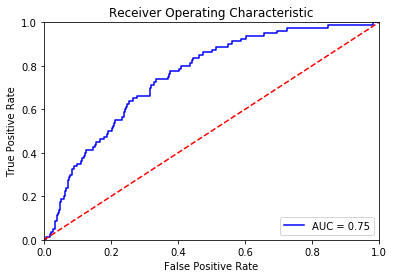

[[1538  491]
 [  33   47]]


 > Epoch 3
Selected Features: 
Attr1, Attr7, Attr10, Attr11, Attr13, Attr14, Attr16, Attr18, Attr19, Attr26, Attr33, Attr35, Attr38, Attr39, Attr48, Attr49, Attr51, Attr56, Attr58, Attr63, 
Class 0: (6756, 65)
Class 1: (271, 65)
Class 0: (4735,)
Class 1: (4735,)
Training complete. Number of epochs: 2878
[-0.24637559 -0.24408771 -0.44436614  0.02186488 -0.12943792 -0.24408771
  0.05907715 -0.24408771 -0.06935693 -0.07077712  0.44846329 -0.17096178
 -0.42419821  0.04850287 -0.0606059   0.1354306   0.57858942  0.14125413
  0.14528977 -0.41595612]

 Custom LR Results:
ROC AUC score: 0.6971430659889344
ROC AUC score: 0.6971430659889344


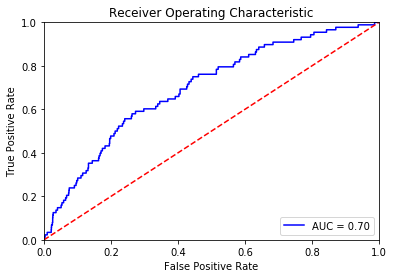

[[1588  433]
 [  44   44]]

 SkLearn LR Results:
ROC AUC score: 0.7542789348207458
ROC AUC score: 0.7542789348207458


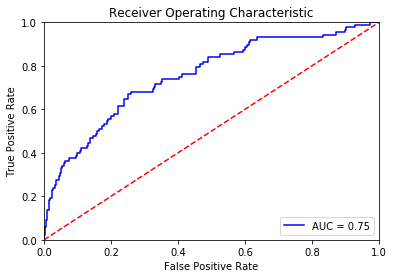

[[1589  432]
 [  37   51]]


 > Epoch 4
Selected Features: 
Attr2, Attr3, Attr4, Attr6, Attr7, Attr9, Attr10, Attr12, Attr14, Attr16, Attr18, Attr24, Attr25, Attr26, Attr29, Attr36, Attr38, Attr40, Attr46, Attr51, 
Class 0: (6756, 65)
Class 1: (271, 65)
Class 0: (4731,)
Class 1: (4731,)
Training complete. Number of epochs: 4837
[ 0.35626136 -0.24196716  0.21768736 -0.15010786 -0.25909385 -0.11003716
 -0.18367458 -0.14329933 -0.25909385  0.19457184 -0.25909385 -0.75038526
 -0.04352853 -0.09548163  0.01589013  0.12212765 -0.26411634  0.41261738
 -0.60003392  0.37528052]

 Custom LR Results:
ROC AUC score: 0.7582833627278072
ROC AUC score: 0.7582833627278072


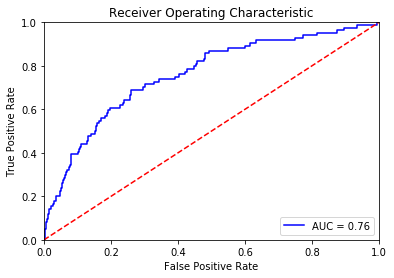

[[1627  398]
 [  33   51]]

 SkLearn LR Results:
ROC AUC score: 0.752010582010582
ROC AUC score: 0.752010582010582


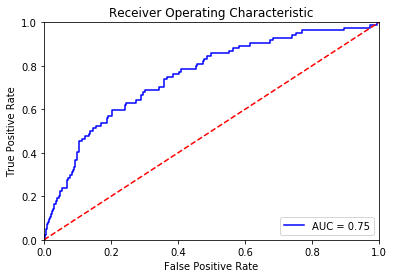

[[1536  489]
 [  33   51]]


 > Epoch 5
Selected Features: 
Attr1, Attr3, Attr4, Attr7, Attr9, Attr12, Attr13, Attr14, Attr16, Attr18, Attr24, Attr26, Attr29, Attr33, Attr35, Attr36, Attr38, Attr50, Attr58, Attr63, 
Class 0: (6756, 65)
Class 1: (271, 65)
Class 0: (4726,)
Class 1: (4726,)
Training complete. Number of epochs: 3848
[-0.1121512  -0.29709061 -0.13510338 -0.11704995 -0.04260573  0.08397352
 -0.14434676 -0.11704995  0.03093346 -0.11704995 -0.55304339 -0.06338648
  0.13485833  0.61655657 -0.08864574  0.14451549 -0.61533381  0.18738127
 -0.28586456 -0.60393544]

 Custom LR Results:
ROC AUC score: 0.7347072395086363
ROC AUC score: 0.7347072395086363


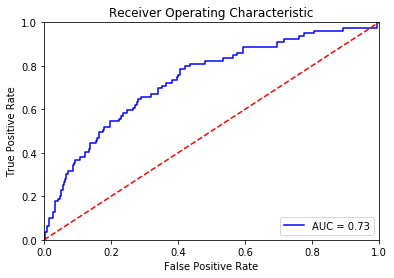

[[1573  457]
 [  36   43]]

 SkLearn LR Results:
ROC AUC score: 0.8091288894431627
ROC AUC score: 0.8091288894431627


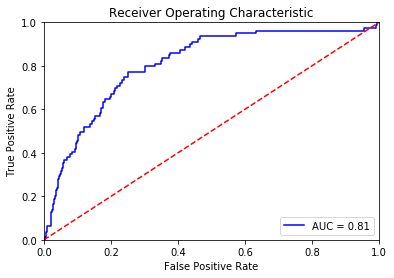

[[1544  486]
 [  20   59]]


 > Epoch 6
Selected Features: 
Attr1, Attr3, Attr4, Attr7, Attr11, Attr12, Attr13, Attr14, Attr18, Attr19, Attr23, Attr24, Attr31, Attr33, Attr38, Attr42, Attr50, Attr52, Attr58, Attr63, 
Class 0: (6756, 65)
Class 1: (271, 65)
Class 0: (4719,)
Class 1: (4719,)
Training complete. Number of epochs: 10000
[ 0.10228891 -0.92377252 -0.11476377 -0.05004216  0.99986347  0.0142612
 -0.31968452 -0.05004216 -0.05004216 -0.27529707 -0.26182962 -0.80073063
 -0.0678242   1.10044634 -0.04835488  0.60796011  0.20173938  0.01347497
 -0.24587199 -1.04674699]

 Custom LR Results:
ROC AUC score: 0.7284405171003109
ROC AUC score: 0.7284405171003109


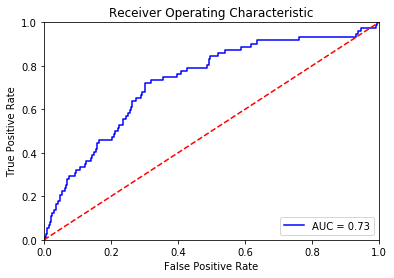

[[1847  190]
 [  50   22]]

 SkLearn LR Results:
ROC AUC score: 0.7659411989308897
ROC AUC score: 0.7659411989308897


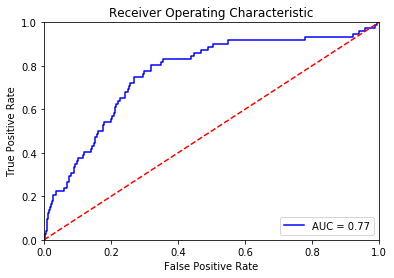

[[1586  451]
 [  27   45]]


 > Epoch 7
Selected Features: 
Attr1, Attr3, Attr7, Attr10, Attr11, Attr13, Attr14, Attr16, Attr18, Attr19, Attr24, Attr26, Attr29, Attr31, Attr33, Attr35, Attr38, Attr40, Attr58, Attr63, 
Class 0: (6756, 65)
Class 1: (271, 65)
Class 0: (4725,)
Class 1: (4725,)
Training complete. Number of epochs: 3265
[-0.1710476  -0.4682949  -0.14766367 -0.35142506  0.14957771 -0.20458427
 -0.14766367 -0.08331372 -0.14766367 -0.13695272 -0.53707175 -0.20859953
  0.17041247 -0.11086319  0.55720831 -0.0938972  -0.4068861   0.07321663
 -0.2365948  -0.51703531]

 Custom LR Results:
ROC AUC score: 0.7072428638159807
ROC AUC score: 0.7072428638159807


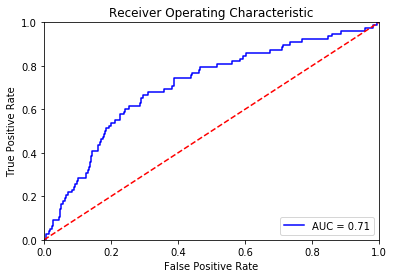

[[1545  486]
 [  32   46]]

 SkLearn LR Results:
ROC AUC score: 0.7598820841066041
ROC AUC score: 0.7598820841066041


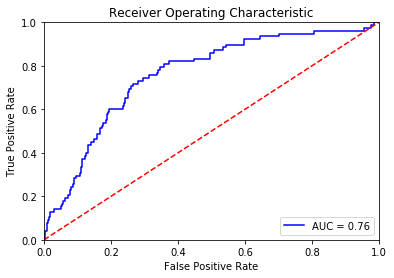

[[1567  464]
 [  31   47]]


 > Epoch 8
Selected Features: 
Attr4, Attr8, Attr9, Attr16, Attr17, Attr20, Attr21, Attr26, Attr28, Attr29, Attr33, Attr36, Attr43, Attr44, Attr46, Attr47, Attr53, Attr58, Attr61, Attr63, 
Class 0: (6756, 65)
Class 1: (271, 65)
Class 0: (4726,)
Class 1: (4726,)
Training complete. Number of epochs: 10000
[ 2.14123022e+00 -2.30250136e+00 -7.20728587e-01 -1.77079971e+00
  8.39192274e-01  1.89265525e+00 -6.93631151e-03 -2.47320550e+00
 -9.42580023e-01  1.24739751e+01  2.54700049e+00  3.15473287e-01
  9.17187096e-01 -9.92144410e-01  6.44945516e-01 -2.15392907e+00
 -1.17795328e-02 -2.49815804e+01 -1.22775098e-01 -2.44238371e+00]

 Custom LR Results:
ROC AUC score: 0.57959406372763
ROC AUC score: 0.57959406372763


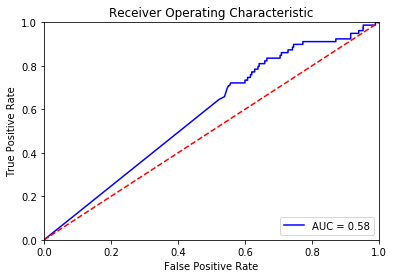

[[ 186 1844]
 [   6   73]]

 SkLearn LR Results:
ROC AUC score: 0.5420776953295504
ROC AUC score: 0.5420776953295504


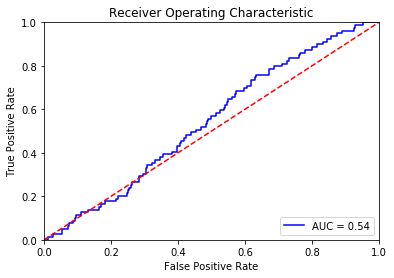

[[2028    2]
 [  79    0]]


 > Epoch 9
Selected Features: 
Attr1, Attr3, Attr7, Attr8, Attr11, Attr12, Attr13, Attr14, Attr16, Attr18, Attr22, Attr26, Attr33, Attr38, Attr40, Attr46, Attr50, Attr51, Attr58, Attr63, 
Class 0: (6756, 65)
Class 1: (271, 65)
Class 0: (4728,)
Class 1: (4728,)
Training complete. Number of epochs: 2533
[-0.20429056 -0.34566086 -0.22287779 -0.18381975 -0.00098008 -0.051303
 -0.04079385 -0.22287779  0.11387076 -0.22287779 -0.10703403  0.0029206
  0.4070269  -0.2111281   0.44542752 -0.363407    0.2814245   0.60360332
 -0.03919759 -0.38725153]

 Custom LR Results:
ROC AUC score: 0.7446763824968954
ROC AUC score: 0.7446763824968954


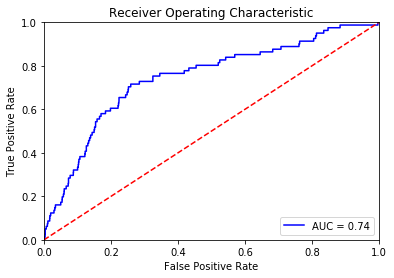

[[1654  374]
 [  33   48]]

 SkLearn LR Results:
ROC AUC score: 0.7338586943287798
ROC AUC score: 0.7338586943287798


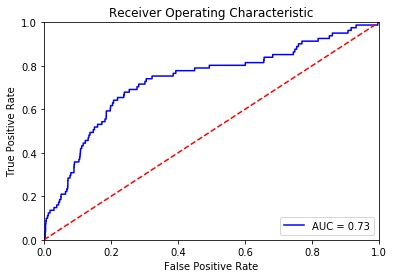

[[1997   31]
 [  71   10]]

 >>> Custom LR Average Score: 0.6894812195176276

 >>> SKLearn LR Average Score: 0.7283270582137483


 *****************************
*****  Year 2  *****
*****************************



 > Epoch 0
Selected Features: 
Attr4, Attr8, Attr9, Attr16, Attr20, Attr21, Attr26, Attr29, Attr33, Attr34, Attr36, Attr37, Attr43, Attr44, Attr46, Attr47, Attr50, Attr58, Attr61, Attr63, 
Class 0: (9773, 65)
Class 1: (400, 65)
Class 0: (6835,)
Class 1: (6835,)
Training complete. Number of epochs: 10000
[ 3.92871686  1.08695375 -1.71653186 -5.48877981  0.86227824  0.52847251
 -4.34744063 19.25191931  0.61561842  3.37994409  2.10403803  0.11055479
 -0.24244553 -1.10999301 -3.76771331 -0.78853764 -0.75439892 -9.84710709
 -0.04961063 -3.69639522]

 Custom LR Results:
ROC AUC score: 0.6245909617474592
ROC AUC score: 0.6245909617474592


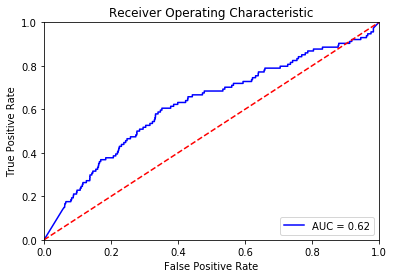

[[2034  904]
 [  54   60]]

 SkLearn LR Results:
ROC AUC score: 0.6281185434655393
ROC AUC score: 0.6281185434655393


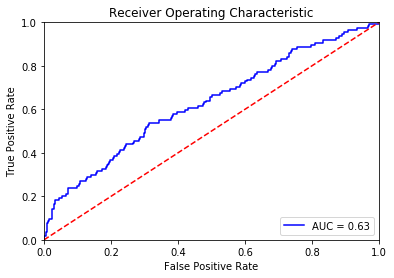

[[2859   79]
 [  98   16]]


 > Epoch 1
Selected Features: 
Attr4, Attr20, Attr21, Attr28, Attr29, Attr32, Attr33, Attr34, Attr36, Attr37, Attr43, Attr44, Attr46, Attr47, Attr50, Attr58, Attr59, Attr61, Attr62, Attr63, 
Class 0: (9773, 65)
Class 1: (400, 65)
Class 0: (6839,)
Class 1: (6839,)
Training complete. Number of epochs: 10000
[ 5.65810167e+00  5.45383295e+00 -1.37862415e-03 -1.02218761e-02
  2.90035782e+01  8.46710847e-01  2.10795724e+00 -1.26311013e+00
  1.21044241e+01 -4.07650113e-01 -3.15550561e-01 -5.77760950e+00
 -5.32340897e+00 -6.87802037e+00 -4.01178247e-01 -3.35531997e+00
 -6.45309841e-02 -4.22962073e+00  3.71489929e+00 -7.26266914e-01]

 Custom LR Results:
ROC AUC score: 0.5947208646725127
ROC AUC score: 0.5947208646725127


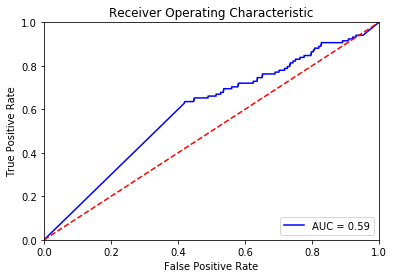

[[1508 1426]
 [  41   77]]

 SkLearn LR Results:
ROC AUC score: 0.698210922787194
ROC AUC score: 0.698210922787194


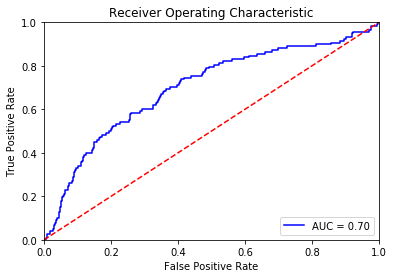

[[2865   69]
 [ 113    5]]


 > Epoch 2
Selected Features: 
Attr4, Attr8, Attr17, Attr20, Attr28, Attr29, Attr33, Attr34, Attr36, Attr37, Attr43, Attr44, Attr46, Attr47, Attr50, Attr53, Attr54, Attr58, Attr61, Attr63, 
Class 0: (9773, 65)
Class 1: (400, 65)
Class 0: (6842,)
Class 1: (6842,)
Training complete. Number of epochs: 10000
[ 2.77571371 -3.38430783  2.51275952  1.18606802 -3.26730613 18.18929745
  1.01015324  2.9891867   2.48641416 -0.18007231  0.15170059 -1.0366767
 -3.21203177 -2.45211814  1.26590223 -0.11206729  3.36122495 -0.12850985
 -0.12279493 -5.97382368]

 Custom LR Results:
ROC AUC score: 0.5375157549252646
ROC AUC score: 0.5375157549252646


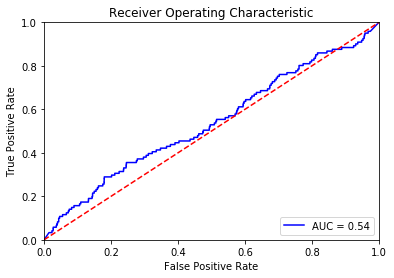

[[2541  390]
 [  98   23]]

 SkLearn LR Results:
ROC AUC score: 0.5772661010401775
ROC AUC score: 0.5772661010401775


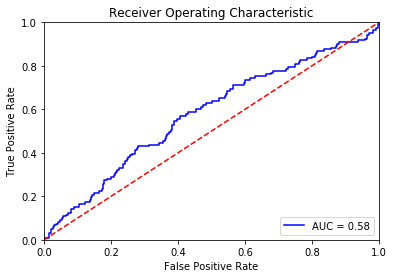

[[2269  662]
 [  81   40]]


 > Epoch 3
Selected Features: 
Attr3, Attr4, Attr8, Attr9, Attr10, Attr16, Attr17, Attr20, Attr21, Attr24, Attr25, Attr26, Attr29, Attr33, Attr34, Attr36, Attr38, Attr46, Attr58, Attr63, 
Class 0: (9773, 65)
Class 1: (400, 65)
Class 0: (6833,)
Class 1: (6833,)
Training complete. Number of epochs: 10000
[-1.01916628  1.14531254  0.14777498 -1.15510486  0.44003717 -0.36971887
 -0.12475436  0.05356124 -0.0052042  -2.02885057 -0.55326919  0.07296934
  0.68480532  0.42094291  0.20833071  1.04289357  0.31448861 -1.19275955
 -0.44258945 -0.59630325]

 Custom LR Results:
ROC AUC score: 0.6026846452866861
ROC AUC score: 0.6026846452866861


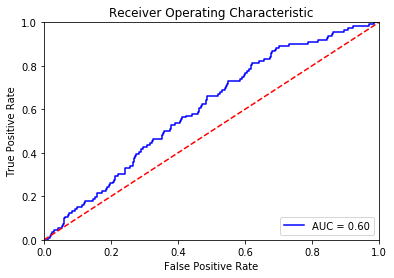

[[ 320 2620]
 [   5  107]]

 SkLearn LR Results:
ROC AUC score: 0.7323736637512147
ROC AUC score: 0.7323736637512147


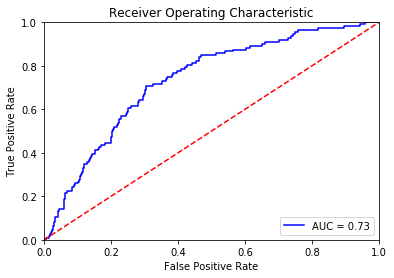

[[2700  240]
 [  87   25]]


 > Epoch 4
Selected Features: 
Attr4, Attr8, Attr9, Attr13, Attr16, Attr17, Attr20, Attr21, Attr28, Attr29, Attr33, Attr34, Attr36, Attr41, Attr43, Attr44, Attr46, Attr54, Attr58, Attr63, 
Class 0: (9773, 65)
Class 1: (400, 65)
Class 0: (6832,)
Class 1: (6832,)
Training complete. Number of epochs: 10000
[ 3.99962959 -2.85586944 -1.56297862 -0.0473423  -0.95155141  2.8836819
 -0.1251539  -0.01782439 -3.65959337 13.58991727  1.6811934   2.78638511
  1.32832704 -2.73080484 -0.48725608 -0.37043474 -3.68342334  3.56894511
 -0.53997689 -5.88402144]

 Custom LR Results:
ROC AUC score: 0.5278525720552242
ROC AUC score: 0.5278525720552242


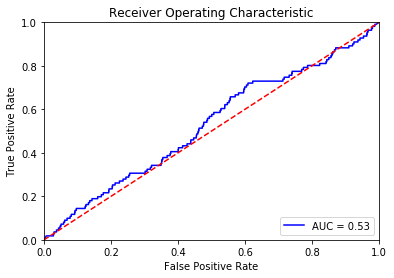

[[2528  413]
 [  91   20]]

 SkLearn LR Results:
ROC AUC score: 0.6860600825238703
ROC AUC score: 0.6860600825238703


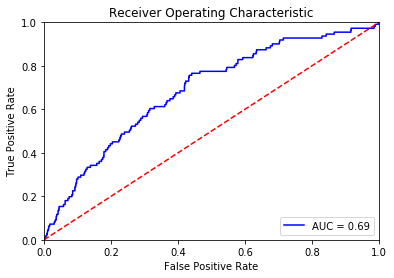

[[2413  528]
 [  66   45]]


 > Epoch 5
Selected Features: 
Attr4, Attr17, Attr20, Attr21, Attr28, Attr29, Attr32, Attr33, Attr34, Attr37, Attr43, Attr44, Attr47, Attr53, Attr54, Attr58, Attr61, Attr62, Attr63, Attr64, 
Class 0: (9773, 65)
Class 1: (400, 65)
Class 0: (6840,)
Class 1: (6840,)
Training complete. Number of epochs: 10000
[ 7.54682880e+00  1.22568121e-01  3.78074657e+00  5.73826975e-02
 -8.25478655e+00  7.69150859e+01 -9.35395890e+00  7.93250761e+00
 -5.76191138e+00  2.69368523e-01 -3.73762575e+00 -7.54056014e+00
 -2.62121631e+00 -2.37688405e-02  8.84193638e+00 -2.99837839e+00
 -2.12984223e+00  1.58033658e+01 -1.94827153e+00  1.31369694e-01]

 Custom LR Results:
ROC AUC score: 0.585920286969203
ROC AUC score: 0.585920286969203


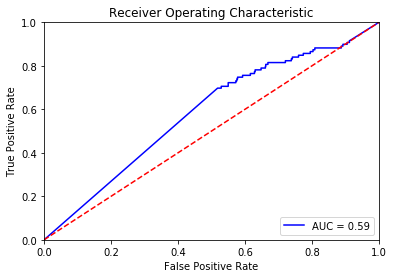

[[1295 1638]
 [  33   86]]

 SkLearn LR Results:
ROC AUC score: 0.6282293346933046
ROC AUC score: 0.6282293346933046


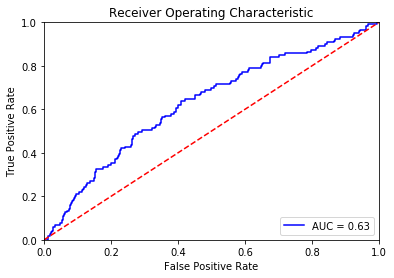

[[2908   25]
 [ 119    0]]


 > Epoch 6
Selected Features: 
Attr2, Attr3, Attr6, Attr9, Attr10, Attr11, Attr14, Attr16, Attr22, Attr24, Attr25, Attr26, Attr29, Attr35, Attr36, Attr38, Attr40, Attr46, Attr51, Attr52, 
Class 0: (9773, 65)
Class 1: (400, 65)
Class 0: (6851,)
Class 1: (6851,)
Training complete. Number of epochs: 2108
[ 0.09095153 -0.10541708 -0.04568964 -0.12898589 -0.0399328  -0.05053388
  0.04013881 -0.12449532 -0.00889218 -0.31743893  0.03438453  0.11590033
  0.04727822 -0.17140996  0.13551114 -0.12631646  0.2086619  -0.1818815
  0.10395606 -0.23508336]

 Custom LR Results:
ROC AUC score: 0.6925841099352393
ROC AUC score: 0.6925841099352393


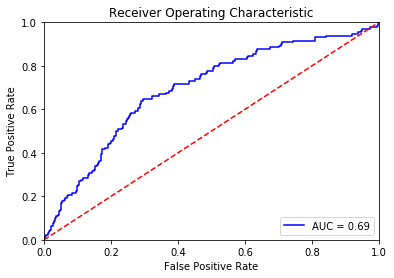

[[2549  373]
 [  93   37]]

 SkLearn LR Results:
ROC AUC score: 0.7056283894066235
ROC AUC score: 0.7056283894066235


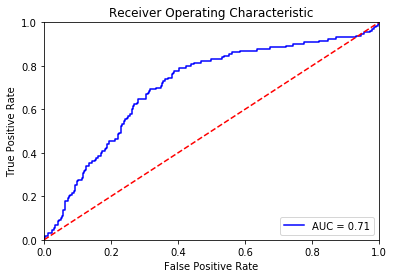

[[2369  553]
 [  74   56]]


 > Epoch 7
Selected Features: 
Attr4, Attr9, Attr10, Attr12, Attr16, Attr20, Attr21, Attr25, Attr26, Attr28, Attr29, Attr33, Attr34, Attr36, Attr38, Attr46, Attr47, Attr50, Attr58, Attr63, 
Class 0: (9773, 65)
Class 1: (400, 65)
Class 0: (6835,)
Class 1: (6835,)
Training complete. Number of epochs: 10000
[ 1.13606501 -1.45538766  0.78110324  1.02061479 -0.67448422  0.01786059
 -0.0071999  -1.36446661 -0.34094889 -0.04659106  1.40547195  1.54451947
  0.57563431  1.34493291  0.77919082 -1.2587593  -0.05424613  0.04684646
 -1.25421441 -2.06313658]

 Custom LR Results:
ROC AUC score: 0.6952903873024971
ROC AUC score: 0.6952903873024971


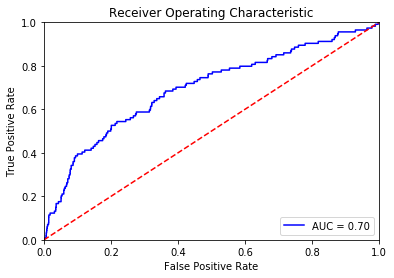

[[ 924 2014]
 [  18   96]]

 SkLearn LR Results:
ROC AUC score: 0.744231664934972
ROC AUC score: 0.744231664934972


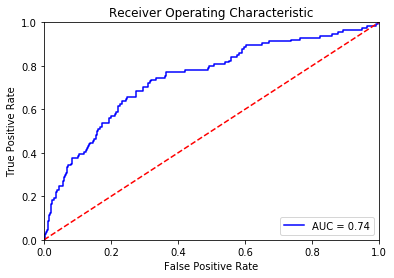

[[2434  504]
 [  55   59]]


 > Epoch 8
Selected Features: 
Attr2, Attr3, Attr8, Attr9, Attr10, Attr11, Attr12, Attr16, Attr17, Attr21, Attr24, Attr25, Attr29, Attr33, Attr36, Attr38, Attr51, Attr52, Attr58, Attr63, 
Class 0: (9773, 65)
Class 1: (400, 65)
Class 0: (6848,)
Class 1: (6848,)
Training complete. Number of epochs: 10000
[-0.13326869 -0.14702006  0.0581394  -0.16291575  0.26303965  0.27909278
  1.35595547 -1.39224985  0.01279397 -0.00228947 -0.54168724 -0.09506686
  0.10366956  0.78478909  0.24907464 -0.06933331  0.05308623 -0.04036467
 -0.11066307 -0.8037101 ]

 Custom LR Results:
ROC AUC score: 0.7408385490275253
ROC AUC score: 0.7408385490275253


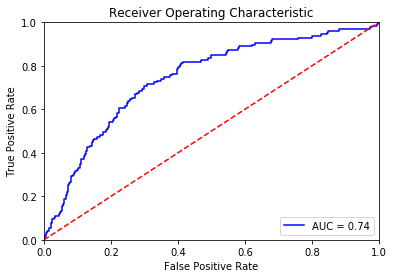

[[1914 1011]
 [  34   93]]

 SkLearn LR Results:
ROC AUC score: 0.7249343832020998
ROC AUC score: 0.7249343832020998


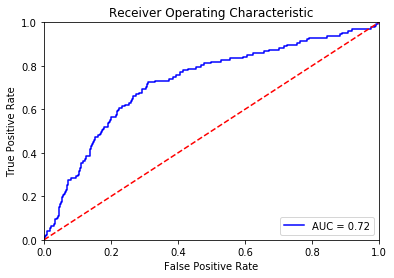

[[2442  483]
 [  66   61]]


 > Epoch 9
Selected Features: 
Attr4, Attr8, Attr9, Attr12, Attr16, Attr17, Attr20, Attr21, Attr26, Attr28, Attr29, Attr33, Attr34, Attr36, Attr40, Attr46, Attr54, Attr58, Attr61, Attr63, 
Class 0: (9773, 65)
Class 1: (400, 65)
Class 0: (6847,)
Class 1: (6847,)
Training complete. Number of epochs: 10000
[ 0.54971828  0.18920534 -1.08049711  0.79337856 -0.69835669 -0.12856944
  0.10787949 -0.00437434 -0.27845142  0.01294629  0.59308855  0.61344834
  0.2017404   1.01147575  0.91116646 -1.54058243 -0.01734569 -0.03411885
  0.01197532 -0.72906209]

 Custom LR Results:
ROC AUC score: 0.5959799390250518
ROC AUC score: 0.5959799390250518


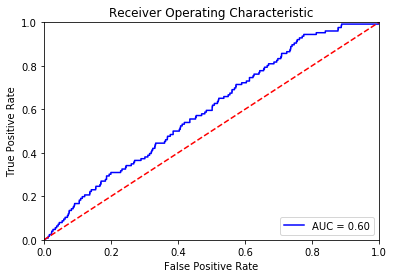

[[ 267 2659]
 [   1  125]]

 SkLearn LR Results:
ROC AUC score: 0.7307690221224056
ROC AUC score: 0.7307690221224056


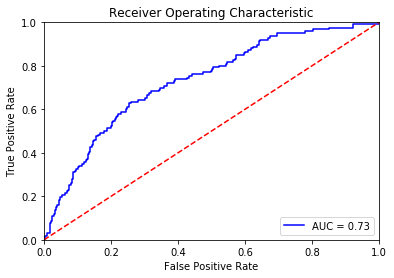

[[2643  283]
 [  85   41]]

 >>> Custom LR Average Score: 0.6197978070946663

 >>> SKLearn LR Average Score: 0.6855822107927401


 *****************************
*****  Year 3  *****
*****************************



 > Epoch 0
Selected Features: 
Attr4, Attr8, Attr9, Attr12, Attr13, Attr16, Attr17, Attr20, Attr28, Attr29, Attr33, Attr34, Attr36, Attr41, Attr46, Attr50, Attr53, Attr54, Attr58, Attr63, 
Class 0: (10008, 65)
Class 1: (495, 65)
Class 0: (6997,)
Class 1: (6997,)
Training complete. Number of epochs: 10000
[ 1.15808558e+00 -8.99572089e-02 -7.91893793e-01  4.97531831e-01
  2.73169032e-02 -7.85796431e-01  8.46083951e-02  3.09664988e-02
 -2.12183650e-01  8.82996845e-01  1.85194807e+00  2.97674992e-01
  6.98499867e-01 -7.47996044e-02 -2.09085080e+00  2.87521582e-01
  2.52634652e-01 -4.06065300e-02 -2.09823766e-03 -2.15000801e+00]

 Custom LR Results:
ROC AUC score: 0.7017673293163162
ROC AUC score: 0.7017673293163162


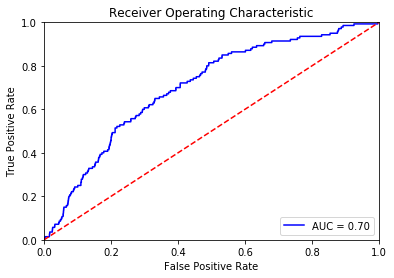

[[ 674 2337]
 [   9  131]]

 SkLearn LR Results:
ROC AUC score: 0.6987984532903164
ROC AUC score: 0.6987984532903164


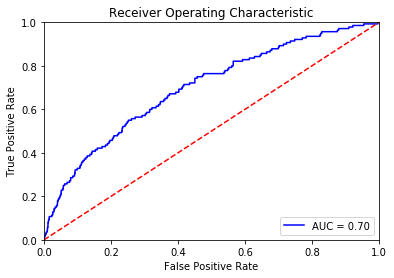

[[2549  462]
 [  82   58]]


 > Epoch 1
Selected Features: 
Attr1, Attr2, Attr4, Attr7, Attr9, Attr10, Attr16, Attr18, Attr19, Attr22, Attr24, Attr25, Attr26, Attr29, Attr31, Attr35, Attr36, Attr40, Attr46, Attr63, 
Class 0: (10008, 65)
Class 1: (495, 65)
Class 0: (7011,)
Class 1: (7011,)
Training complete. Number of epochs: 10000
[-0.20103773  0.10238505  0.14201175 -0.21822397 -0.11412173  0.10850136
  0.10626452 -0.21822397 -0.04580951 -0.16231422 -0.73746109  0.07580005
 -0.13629044 -0.00975861  0.06308061 -0.31987974  0.23942562  0.40933232
 -0.55354686 -0.0019546 ]

 Custom LR Results:
ROC AUC score: 0.7133659633659635
ROC AUC score: 0.7133659633659635


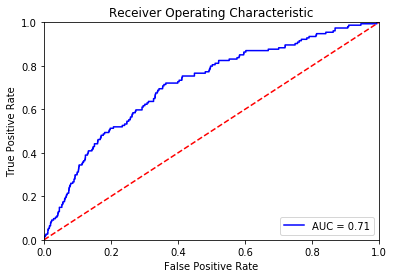

[[2407  590]
 [  76   78]]

 SkLearn LR Results:
ROC AUC score: 0.7233120566453899
ROC AUC score: 0.7233120566453899


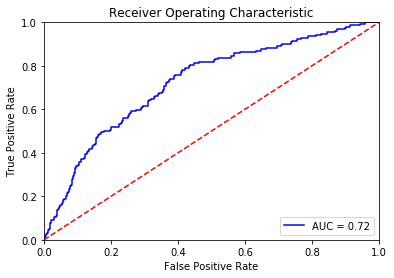

[[2340  657]
 [  74   80]]


 > Epoch 2
Selected Features: 
Attr4, Attr9, Attr16, Attr17, Attr20, Attr26, Attr28, Attr29, Attr33, Attr34, Attr36, Attr40, Attr43, Attr46, Attr50, Attr53, Attr54, Attr58, Attr61, Attr63, 
Class 0: (10008, 65)
Class 1: (495, 65)
Class 0: (6998,)
Class 1: (6998,)
Training complete. Number of epochs: 10000
[ 3.11800922 -2.0736412  -0.52648807 -0.02260939 -0.31064276 -0.90668613
 -0.40830468  5.52354299  5.32611961  1.4633507   4.76277483  1.18907833
 -0.70321282 -7.43563976  1.40096936 -0.06865484  0.3212926  -6.35529796
 -0.1595157  -7.04213798]

 Custom LR Results:
ROC AUC score: 0.5363433943592281
ROC AUC score: 0.5363433943592281


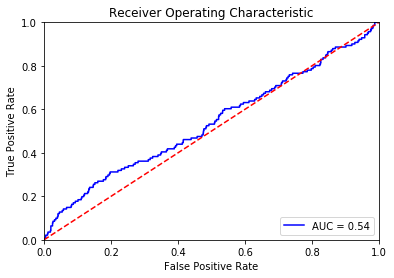

[[2984   26]
 [ 138    3]]

 SkLearn LR Results:
ROC AUC score: 0.7366697297424658
ROC AUC score: 0.7366697297424658


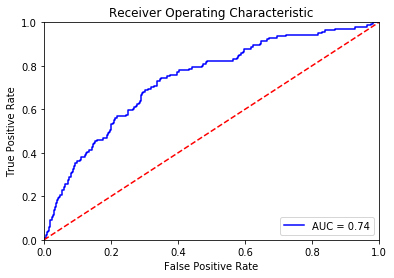

[[2549  461]
 [  77   64]]


 > Epoch 3
Selected Features: 
Attr2, Attr6, Attr8, Attr9, Attr10, Attr12, Attr13, Attr24, Attr29, Attr31, Attr33, Attr35, Attr36, Attr38, Attr40, Attr46, Attr50, Attr51, Attr58, Attr63, 
Class 0: (10008, 65)
Class 1: (495, 65)
Class 0: (6979,)
Class 1: (6979,)
Training complete. Number of epochs: 2643
[ 0.06887832  0.14161408 -0.0632534  -0.05098468 -0.0114562   0.20065458
 -0.04147831 -0.38609709  0.03634147  0.04474475  0.54087444 -0.18102129
  0.13521248 -0.02548325  0.23216184 -0.48659803  0.23440331  0.00458462
 -0.00585877 -0.53632354]

 Custom LR Results:
ROC AUC score: 0.745958467058868
ROC AUC score: 0.745958467058868


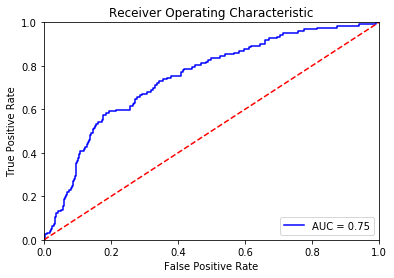

[[2364  665]
 [  49   73]]

 SkLearn LR Results:
ROC AUC score: 0.7472600923315058
ROC AUC score: 0.7472600923315058


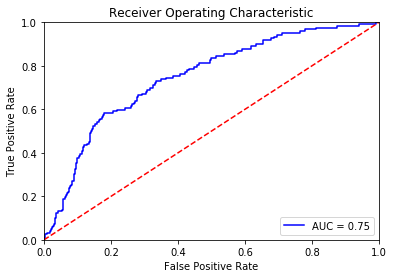

[[2347  682]
 [  49   73]]


 > Epoch 4
Selected Features: 
Attr4, Attr8, Attr9, Attr17, Attr20, Attr21, Attr28, Attr29, Attr33, Attr34, Attr36, Attr44, Attr46, Attr47, Attr50, Attr53, Attr54, Attr58, Attr61, Attr63, 
Class 0: (10008, 65)
Class 1: (495, 65)
Class 0: (6998,)
Class 1: (6998,)
Training complete. Number of epochs: 10000
[ 1.53417141 -1.5427919  -2.14222214  1.47689575  0.08904868 -0.01087381
  0.31114863  5.79952932  3.65662091  1.51202584  3.56434175 -0.29204622
 -3.41981831 -0.36273438  0.94615547  0.05657718 -0.38788509 -6.41748768
 -0.16817426 -5.51435145]

 Custom LR Results:
ROC AUC score: 0.5796529299498127
ROC AUC score: 0.5796529299498127


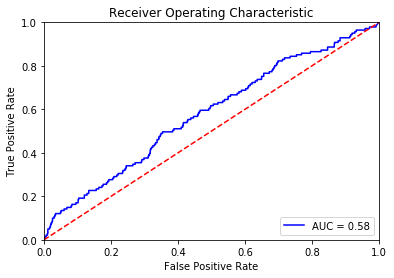

[[2827  183]
 [ 121   20]]

 SkLearn LR Results:
ROC AUC score: 0.6973480832214133
ROC AUC score: 0.6973480832214133


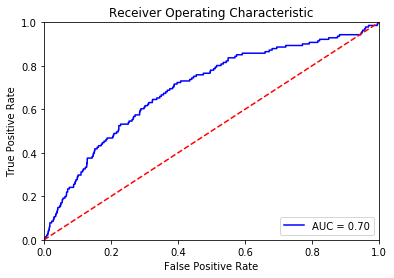

[[2996   14]
 [ 140    1]]


 > Epoch 5
Selected Features: 
Attr2, Attr3, Attr4, Attr6, Attr8, Attr9, Attr10, Attr12, Attr16, Attr24, Attr26, Attr29, Attr33, Attr36, Attr38, Attr46, Attr50, Attr51, Attr58, Attr63, 
Class 0: (10008, 65)
Class 1: (495, 65)
Class 0: (7007,)
Class 1: (7007,)
Training complete. Number of epochs: 1720
[ 0.06064409  0.00485167  0.14775085  0.0840357  -0.16237415 -0.02952314
  0.00367807  0.12044424 -0.11722073 -0.28437274 -0.09511475  0.05126456
  0.38736187  0.0743318  -0.00943288 -0.27184806  0.17486321  0.00500261
 -0.00886266 -0.41155932]

 Custom LR Results:
ROC AUC score: 0.7393557702987892
ROC AUC score: 0.7393557702987892


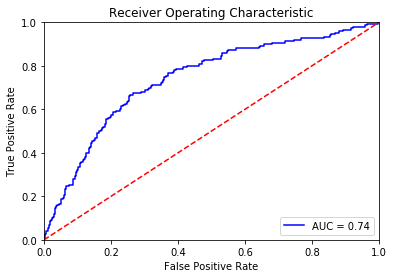

[[2241  760]
 [  54   96]]

 SkLearn LR Results:
ROC AUC score: 0.7376030212151503
ROC AUC score: 0.7376030212151503


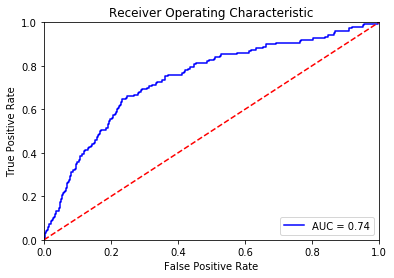

[[2183  818]
 [  50  100]]


 > Epoch 6
Selected Features: 
Attr2, Attr4, Attr8, Attr9, Attr10, Attr12, Attr13, Attr17, Attr24, Attr28, Attr29, Attr33, Attr34, Attr36, Attr40, Attr46, Attr51, Attr54, Attr58, Attr63, 
Class 0: (10008, 65)
Class 1: (495, 65)
Class 0: (7000,)
Class 1: (7000,)
Training complete. Number of epochs: 10000
[ 0.01781333  0.26264048 -0.25504422 -0.27203114  0.12155293 -0.08574621
 -0.01667845  0.12410927 -0.42188653 -0.03121468  0.07475733  0.49463842
  0.09054672  0.26535889  0.26475937 -0.57280568  0.05017475  0.02534267
 -0.02675628 -0.5593872 ]

 Custom LR Results:
ROC AUC score: 0.749238627064425
ROC AUC score: 0.749238627064425


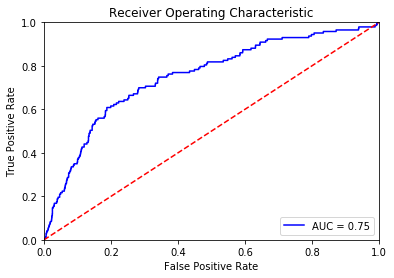

[[2130  878]
 [  43  100]]

 SkLearn LR Results:
ROC AUC score: 0.7451597604523137
ROC AUC score: 0.7451597604523137


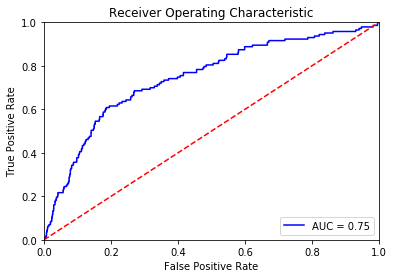

[[2149  859]
 [  45   98]]


 > Epoch 7
Selected Features: 
Attr2, Attr4, Attr8, Attr9, Attr10, Attr11, Attr17, Attr22, Attr24, Attr25, Attr26, Attr33, Attr34, Attr35, Attr36, Attr38, Attr46, Attr50, Attr51, Attr63, 
Class 0: (10008, 65)
Class 1: (495, 65)
Class 0: (6996,)
Class 1: (6996,)
Training complete. Number of epochs: 1402
[ 0.127403    0.18408221 -0.26338891 -0.15236944  0.07763516 -0.04654367
  0.01840983 -0.05261761 -0.18163502  0.05472021 -0.17673586  0.32574275
  0.0859245  -0.08282809  0.14707275  0.08813554 -0.31457233  0.13777353
  0.07188441 -0.36454349]

 Custom LR Results:
ROC AUC score: 0.7154427852140598
ROC AUC score: 0.7154427852140598


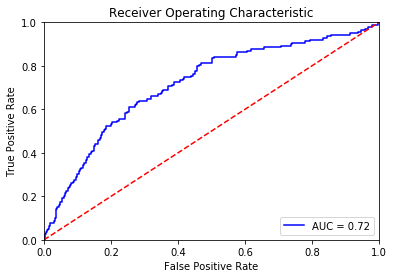

[[2302  710]
 [  62   77]]

 SkLearn LR Results:
ROC AUC score: 0.7180558342170886
ROC AUC score: 0.7180558342170886


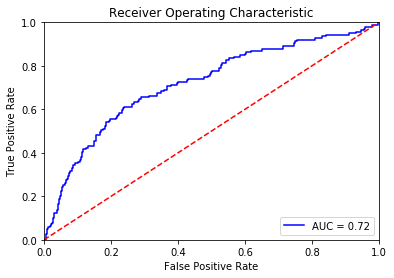

[[2179  833]
 [  51   88]]


 > Epoch 8
Selected Features: 
Attr2, Attr4, Attr9, Attr10, Attr12, Attr24, Attr28, Attr29, Attr33, Attr34, Attr36, Attr38, Attr40, Attr46, Attr50, Attr51, Attr53, Attr54, Attr58, Attr63, 
Class 0: (10008, 65)
Class 1: (495, 65)
Class 0: (6991,)
Class 1: (6991,)
Training complete. Number of epochs: 10000
[ 0.07714029  0.39245378 -0.25986498  0.11404228 -0.10175534 -0.48272511
  0.03507886  0.07890739  0.34152454  0.10913031  0.34904703  0.05962872
  0.3486001  -0.75981358 -0.13864664  0.03573466  0.00250476 -0.06426719
 -0.01639095 -0.44663869]

 Custom LR Results:
ROC AUC score: 0.7607166355824457
ROC AUC score: 0.7607166355824457


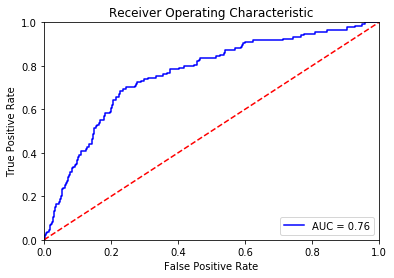

[[2220  797]
 [  40   94]]

 SkLearn LR Results:
ROC AUC score: 0.7787809378694858
ROC AUC score: 0.7787809378694858


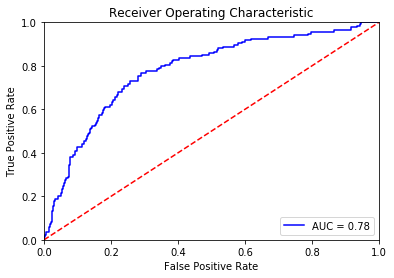

[[2182  835]
 [  36   98]]


 > Epoch 9
Selected Features: 
Attr8, Attr17, Attr20, Attr21, Attr29, Attr32, Attr33, Attr34, Attr37, Attr43, Attr44, Attr46, Attr50, Attr53, Attr54, Attr58, Attr60, Attr61, Attr63, Attr64, 
Class 0: (10008, 65)
Class 1: (495, 65)
Class 0: (7018,)
Class 1: (7018,)
Training complete. Number of epochs: 10000
[-9.72456925e+00  2.74974658e+00 -8.32030512e-02 -2.27555258e-02
  4.26221607e+01 -1.04780692e-01  4.92886756e+00  7.20323646e+00
 -7.45200386e-02 -3.34184979e-01 -2.12873408e-01 -1.06698575e+00
  7.60763659e+00  7.49462047e-01 -2.28668009e+00 -9.48634148e+00
 -7.08575837e-01 -8.67056649e-02 -1.28700949e+01  1.33939361e-01]

 Custom LR Results:
ROC AUC score: 0.48930077483952716
ROC AUC score: 0.48930077483952716


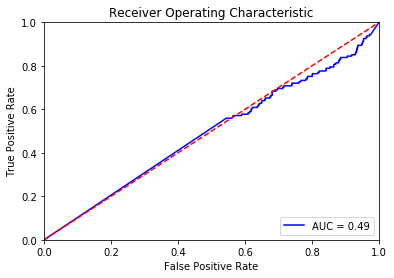

[[ 828 2162]
 [  47  114]]

 SkLearn LR Results:
ROC AUC score: 0.6588743015019007
ROC AUC score: 0.6588743015019007


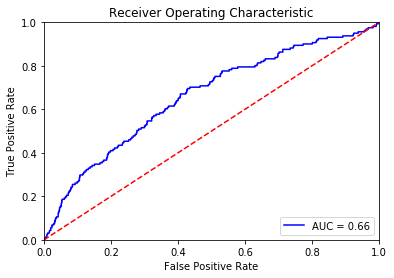

[[2973   17]
 [ 159    2]]

 >>> Custom LR Average Score: 0.6731142677049434

 >>> SKLearn LR Average Score: 0.7241862270487031


 *****************************
*****  Year 4  *****
*****************************



 > Epoch 0
Selected Features: 
Attr4, Attr8, Attr9, Attr16, Attr17, Attr20, Attr21, Attr29, Attr36, Attr38, Attr39, Attr40, Attr46, Attr47, Attr50, Attr52, Attr56, Attr58, Attr59, Attr63, 
Class 0: (9277, 65)
Class 1: (515, 65)
Class 0: (6492,)
Class 1: (6492,)
Training complete. Number of epochs: 10000
[-0.01153741 -0.24495145 -1.04622519 -1.45854363  0.00415072  0.478447
  0.32505057  0.72835428  0.74516549 -2.77879567  0.04592291  1.74084679
 -3.22297841 -0.29175864  1.84956483 -0.08536651  0.23538772 -0.26638918
 -0.18601322  0.12046533]

 Custom LR Results:
ROC AUC score: 0.6444303634080801
ROC AUC score: 0.6444303634080801


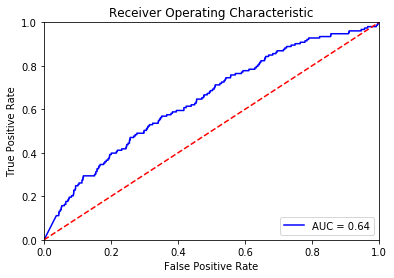

[[ 582 2203]
 [  11  142]]

 SkLearn LR Results:
ROC AUC score: 0.6991058541908683
ROC AUC score: 0.6991058541908683


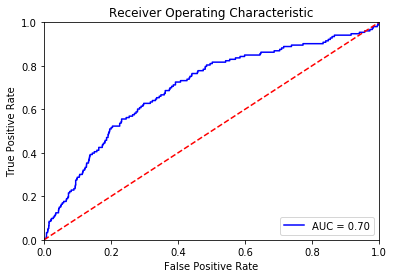

[[2295  490]
 [  86   67]]


 > Epoch 1
Selected Features: 
Attr1, Attr2, Attr7, Attr9, Attr10, Attr11, Attr13, Attr14, Attr16, Attr18, Attr26, Attr29, Attr35, Attr36, Attr38, Attr39, Attr40, Attr46, Attr49, Attr51, 
Class 0: (9277, 65)
Class 1: (515, 65)
Class 0: (6494,)
Class 1: (6494,)
Training complete. Number of epochs: 2656
[-0.18125347  0.15282952 -0.19865904 -0.14081247  0.06951355 -0.12730028
 -0.02590108 -0.1986592  -0.12347363 -0.1987172   0.1009716  -0.03332879
 -0.39830432  0.17268218  0.09635822 -0.20031204  0.25827374 -0.23633572
  0.21076407  0.05306353]

 Custom LR Results:
ROC AUC score: 0.7930801061745854
ROC AUC score: 0.7930801061745854


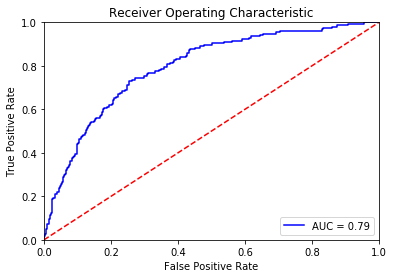

[[2525  258]
 [  94   61]]

 SkLearn LR Results:
ROC AUC score: 0.7943574467098629
ROC AUC score: 0.7943574467098629


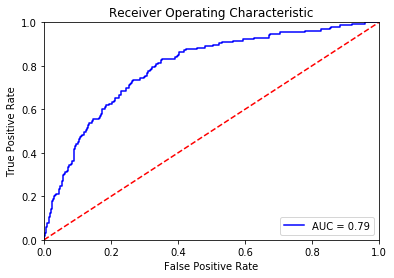

[[2529  254]
 [  90   65]]


 > Epoch 2
Selected Features: 
Attr2, Attr7, Attr8, Attr9, Attr10, Attr11, Attr13, Attr14, Attr16, Attr17, Attr18, Attr21, Attr26, Attr29, Attr35, Attr38, Attr40, Attr46, Attr51, Attr58, 
Class 0: (9277, 65)
Class 1: (515, 65)
Class 0: (6487,)
Class 1: (6487,)
Training complete. Number of epochs: 10000
[ 0.27579016 -0.18826104 -0.06772463  0.0284588   0.41488294 -0.03975289
 -0.00476212 -0.18826107 -0.24768707  0.02936199 -0.18827302 -0.00422857
  0.18831465 -0.04465798 -1.14166099 -0.13616164  0.10293715 -0.07154987
  0.03085135 -0.01018989]

 Custom LR Results:
ROC AUC score: 0.7791061222512836
ROC AUC score: 0.7791061222512836


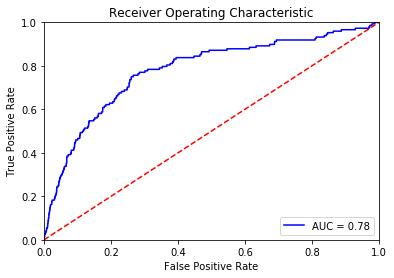

[[2461  329]
 [  74   74]]

 SkLearn LR Results:
ROC AUC score: 0.7690581710743001
ROC AUC score: 0.7690581710743001


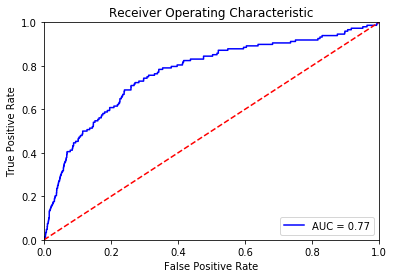

[[2482  308]
 [  77   71]]


 > Epoch 3
Selected Features: 
Attr2, Attr4, Attr7, Attr8, Attr9, Attr10, Attr11, Attr14, Attr17, Attr18, Attr22, Attr25, Attr29, Attr34, Attr35, Attr36, Attr38, Attr40, Attr46, Attr51, 
Class 0: (9277, 65)
Class 1: (515, 65)
Class 0: (6510,)
Class 1: (6510,)
Training complete. Number of epochs: 10000
[ 0.07247167  0.28628491 -0.76600066 -0.04136861 -0.38017127  0.27459409
 -0.41299253 -0.76600529  0.00247794 -0.7677347  -0.25559857 -0.10688705
 -0.04361197  0.04957188 -0.70835508  0.31676311 -0.071552    0.32960084
 -0.59173588  0.14669251]

 Custom LR Results:
ROC AUC score: 0.6939208338881175
ROC AUC score: 0.6939208338881175


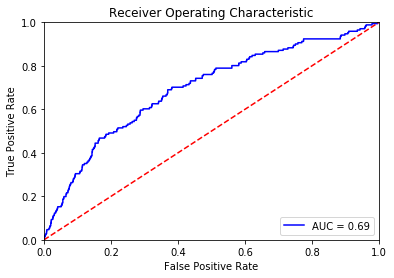

[[2264  503]
 [  90   81]]

 SkLearn LR Results:
ROC AUC score: 0.700647987877174
ROC AUC score: 0.700647987877174


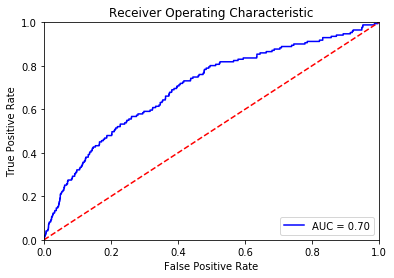

[[2332  435]
 [  97   74]]


 > Epoch 4
Selected Features: 
Attr1, Attr2, Attr8, Attr9, Attr11, Attr16, Attr17, Attr18, Attr26, Attr29, Attr34, Attr35, Attr38, Attr40, Attr41, Attr46, Attr51, Attr56, Attr58, Attr63, 
Class 0: (9277, 65)
Class 1: (515, 65)
Class 0: (6481,)
Class 1: (6481,)
Training complete. Number of epochs: 10000
[-0.3598844   0.09629967  0.00710173 -0.12558503 -0.14044776 -0.35235192
 -0.02192131 -0.38707044  0.30292913  0.14918231  0.11406151 -0.9061442
  0.08197285  0.9989999  -0.0177366  -0.96792622  0.02706427  0.08884137
  0.04123659 -0.03258732]

 Custom LR Results:
ROC AUC score: 0.7165669265953375
ROC AUC score: 0.7165669265953375


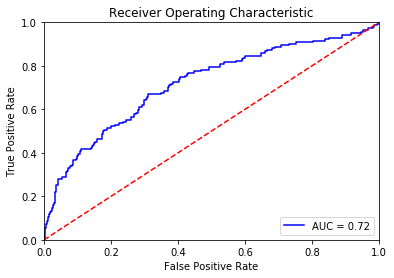

[[2219  577]
 [  68   74]]

 SkLearn LR Results:
ROC AUC score: 0.7084567490781599
ROC AUC score: 0.7084567490781599


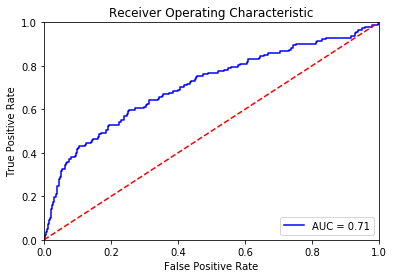

[[2547  249]
 [  88   54]]


 > Epoch 5
Selected Features: 
Attr2, Attr8, Attr9, Attr12, Attr16, Attr17, Attr21, Attr26, Attr29, Attr33, Attr34, Attr36, Attr37, Attr38, Attr40, Attr46, Attr52, Attr58, Attr59, Attr63, 
Class 0: (9277, 65)
Class 1: (515, 65)
Class 0: (6493,)
Class 1: (6493,)
Training complete. Number of epochs: 10000
[ 0.63911698 -0.67015286 -1.0538305   0.09492968 -0.86266658  0.61245413
 -0.00512964  0.69106663  0.00395679  0.15114595  0.20334811  0.91920852
 -0.27152358 -0.03465677  0.76103775 -0.72768538 -0.11914939 -0.00405783
 -0.00889985 -0.26827457]

 Custom LR Results:
ROC AUC score: 0.5711276869682042
ROC AUC score: 0.5711276869682042


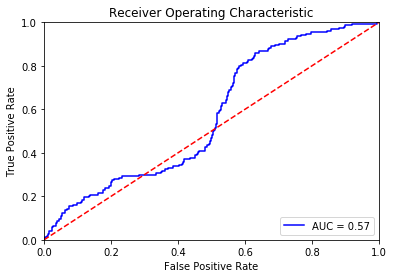

[[2594  190]
 [ 132   22]]

 SkLearn LR Results:
ROC AUC score: 0.7102995782952679
ROC AUC score: 0.7102995782952679


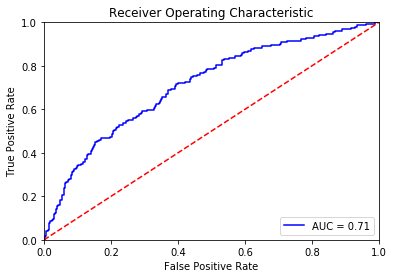

[[2773   11]
 [ 151    3]]


 > Epoch 6
Selected Features: 
Attr1, Attr2, Attr3, Attr8, Attr9, Attr10, Attr11, Attr16, Attr17, Attr18, Attr22, Attr25, Attr26, Attr29, Attr35, Attr38, Attr40, Attr46, Attr51, Attr58, 
Class 0: (9277, 65)
Class 1: (515, 65)
Class 0: (6502,)
Class 1: (6502,)
Training complete. Number of epochs: 10000
[-0.13757605  0.22597832 -0.34820136  0.04326709  0.01020768  0.25900912
 -0.008594   -0.07938388 -0.05166804 -0.17932084  0.15256918  0.02461538
  0.06807422 -0.08810391 -1.16416306 -0.14583255  0.10626853 -0.08530123
  0.53012576  0.02208954]

 Custom LR Results:
ROC AUC score: 0.7222417509534074
ROC AUC score: 0.7222417509534074


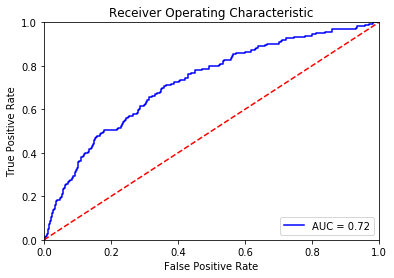

[[2469  306]
 [ 104   59]]

 SkLearn LR Results:
ROC AUC score: 0.7245874094953848
ROC AUC score: 0.7245874094953848


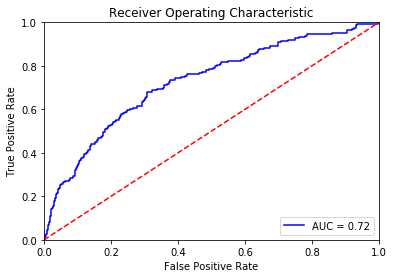

[[2419  356]
 [  97   66]]


 > Epoch 7
Selected Features: 
Attr2, Attr8, Attr9, Attr10, Attr12, Attr16, Attr17, Attr21, Attr26, Attr29, Attr33, Attr34, Attr36, Attr38, Attr40, Attr46, Attr50, Attr51, Attr52, Attr63, 
Class 0: (9277, 65)
Class 1: (515, 65)
Class 0: (6499,)
Class 1: (6499,)
Training complete. Number of epochs: 10000
[ 0.33824279 -0.02664527 -0.22024624  0.25518373  0.04308629 -0.15784279
  0.02495776 -0.01916255  0.08423195 -0.11050392  0.09822818 -0.01635182
  0.21430025  0.08963157  0.31423745 -0.46168576  0.14933962  0.15203177
 -0.01444182 -0.05548489]

 Custom LR Results:
ROC AUC score: 0.6922538696904248
ROC AUC score: 0.6922538696904248


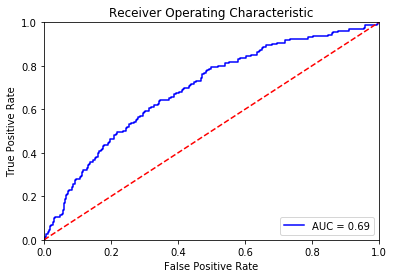

[[2400  378]
 [ 104   56]]

 SkLearn LR Results:
ROC AUC score: 0.6910052195824333
ROC AUC score: 0.6910052195824333


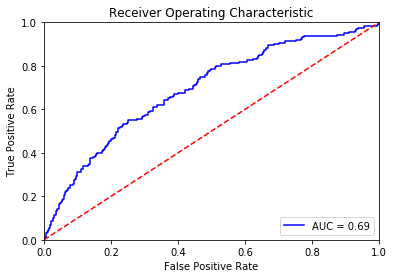

[[2322  456]
 [  96   64]]


 > Epoch 8
Selected Features: 
Attr1, Attr2, Attr4, Attr7, Attr9, Attr10, Attr11, Attr14, Attr16, Attr17, Attr18, Attr22, Attr26, Attr29, Attr35, Attr36, Attr38, Attr40, Attr46, Attr51, 
Class 0: (9277, 65)
Class 1: (515, 65)
Class 0: (6485,)
Class 1: (6485,)
Training complete. Number of epochs: 10000
[-0.09587049  0.46381843  0.12147546 -0.22640426 -0.29712053  0.34438622
  0.13795968 -0.22641213 -0.0390804  -0.00842491 -0.22935659  0.23659426
  0.03365507 -0.13882814 -1.37098085  0.33652904  0.10028992  0.257536
 -0.38024374  0.00965577]

 Custom LR Results:
ROC AUC score: 0.7147365761274875
ROC AUC score: 0.7147365761274875


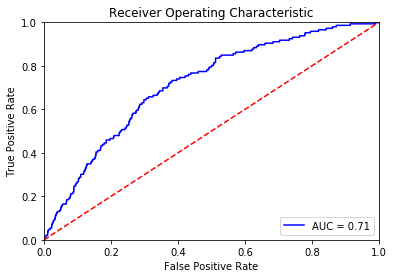

[[2467  325]
 [ 102   44]]

 SkLearn LR Results:
ROC AUC score: 0.7352526298229776
ROC AUC score: 0.7352526298229776


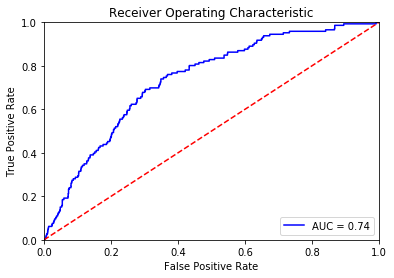

[[2652  140]
 [ 124   22]]


 > Epoch 9
Selected Features: 
Attr1, Attr2, Attr7, Attr9, Attr10, Attr11, Attr14, Attr16, Attr17, Attr18, Attr22, Attr26, Attr29, Attr34, Attr35, Attr36, Attr38, Attr40, Attr51, Attr63, 
Class 0: (9277, 65)
Class 1: (515, 65)
Class 0: (6504,)
Class 1: (6504,)
Training complete. Number of epochs: 5048
[-0.14506939  0.13994954 -0.20421004 -0.33169698  0.07374782 -0.06281443
 -0.20421006  0.13290602 -0.0421578  -0.20421701  0.04366597 -0.17398962
 -0.03011712  0.0904069  -0.69342121  0.37417998  0.07662374  0.03872175
  0.04950096 -0.07433555]

 Custom LR Results:
ROC AUC score: 0.7201193325246696
ROC AUC score: 0.7201193325246696


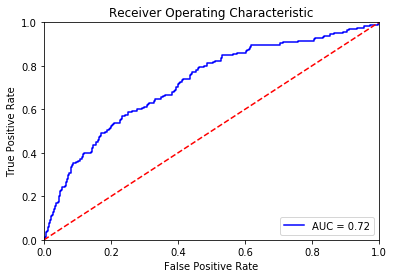

[[2394  379]
 [  99   66]]

 SkLearn LR Results:
ROC AUC score: 0.7193609371755783
ROC AUC score: 0.7193609371755783


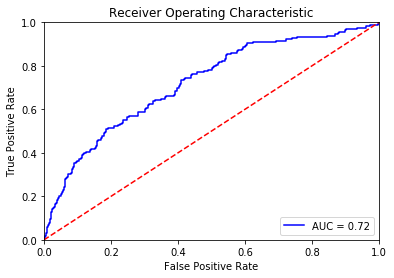

[[2333  440]
 [  91   74]]

 >>> Custom LR Average Score: 0.7047583568581597

 >>> SKLearn LR Average Score: 0.7252131983302007


 *****************************
*****  Year 5  *****
*****************************



 > Epoch 0
Selected Features: 
Attr2, Attr3, Attr6, Attr11, Attr16, Attr17, Attr24, Attr25, Attr26, Attr29, Attr33, Attr35, Attr38, Attr39, Attr40, Attr46, Attr48, Attr50, Attr56, Attr63, 
Class 0: (5500, 65)
Class 1: (410, 65)
Class 0: (3852,)
Class 1: (3852,)
Training complete. Number of epochs: 3174
[ 0.51525291 -0.38169935 -0.17649629 -0.12113821 -0.12747368 -0.14685105
  0.13872894 -0.32161418 -0.14239691 -0.00123038  0.68052218 -0.57198254
 -0.19901371 -0.40426164  0.56124786 -0.61711662 -0.04843144  0.26781697
 -0.19866687 -0.62078695]

 Custom LR Results:
ROC AUC score: 0.8325728155339807
ROC AUC score: 0.8325728155339807


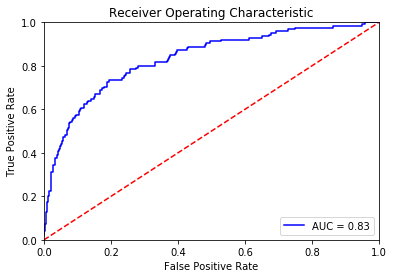

[[1461  187]
 [  49   76]]

 SkLearn LR Results:
ROC AUC score: 0.8407791262135922
ROC AUC score: 0.8407791262135922


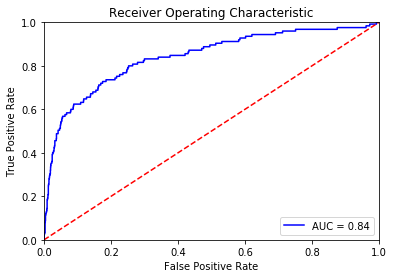

[[1414  234]
 [  41   84]]


 > Epoch 1
Selected Features: 
Attr2, Attr3, Attr9, Attr10, Attr13, Attr16, Attr17, Attr20, Attr24, Attr25, Attr26, Attr29, Attr33, Attr34, Attr36, Attr38, Attr47, Attr57, Attr58, Attr63, 
Class 0: (5500, 65)
Class 1: (410, 65)
Class 0: (3844,)
Class 1: (3844,)
Training complete. Number of epochs: 10000
[ 2.45893753e+00 -2.32634346e+00 -4.80881195e-01 -1.23413366e+00
 -1.62836895e-03  3.90095687e-01 -4.24745842e-01  7.55174296e-01
 -7.17461045e-02 -2.08450201e+00  3.58888863e-01 -5.17634750e-01
  1.66390523e+00  4.35842987e-01  3.83774418e-01 -1.71837616e+00
 -4.89193484e-01 -1.58018477e-01  2.26846402e-01 -1.66441792e+00]

 Custom LR Results:
ROC AUC score: 0.674336264915975
ROC AUC score: 0.674336264915975


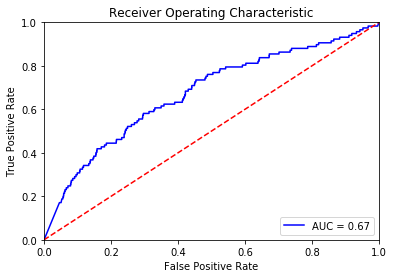

[[ 541 1115]
 [  17  100]]

 SkLearn LR Results:
ROC AUC score: 0.8128870927783971
ROC AUC score: 0.8128870927783971


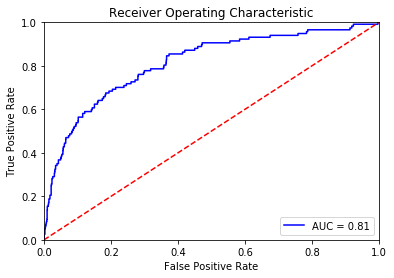

[[1403  253]
 [  44   73]]


 > Epoch 2
Selected Features: 
Attr2, Attr3, Attr4, Attr7, Attr8, Attr11, Attr12, Attr14, Attr16, Attr25, Attr29, Attr33, Attr35, Attr39, Attr40, Attr48, Attr50, Attr56, Attr58, Attr63, 
Class 0: (5500, 65)
Class 1: (410, 65)
Class 0: (3841,)
Class 1: (3841,)
Training complete. Number of epochs: 2360
[ 0.47308647 -0.39845841 -0.4129458  -0.15686646 -0.13463178 -0.14142645
  0.07251575 -0.1571722  -0.20617684 -0.35522021 -0.09597023  0.59523385
 -0.24032595 -0.29108749  0.29517322 -0.09291508  0.30991181 -0.18429083
  0.24279439 -0.52931591]

 Custom LR Results:
ROC AUC score: 0.8343273796305108
ROC AUC score: 0.8343273796305108


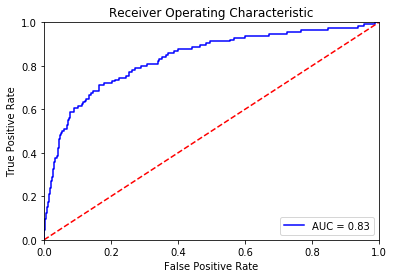

[[1423  236]
 [  37   77]]

 SkLearn LR Results:
ROC AUC score: 0.856249272971458
ROC AUC score: 0.856249272971458


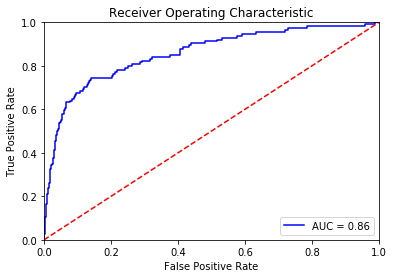

[[1388  271]
 [  29   85]]


 > Epoch 3
Selected Features: 
Attr2, Attr4, Attr6, Attr7, Attr9, Attr10, Attr14, Attr16, Attr18, Attr22, Attr24, Attr26, Attr29, Attr33, Attr35, Attr38, Attr48, Attr50, Attr51, Attr63, 
Class 0: (5500, 65)
Class 1: (410, 65)
Class 0: (3848,)
Class 1: (3848,)
Training complete. Number of epochs: 10000
[ 1.03603102 -0.17080743  0.18473359 -0.20475786 -0.09184861 -0.1762224
 -0.204763    0.00410901 -0.20665158 -0.21656057  0.26026236 -0.27374172
 -0.2527379   0.50406449 -1.29771996 -0.23710483  0.0217821   0.21104699
  0.8790808  -0.44225302]

 Custom LR Results:
ROC AUC score: 0.8045769715646449
ROC AUC score: 0.8045769715646449


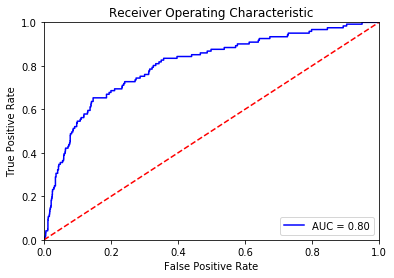

[[1418  234]
 [  44   77]]

 SkLearn LR Results:
ROC AUC score: 0.8066080683569128
ROC AUC score: 0.8066080683569128


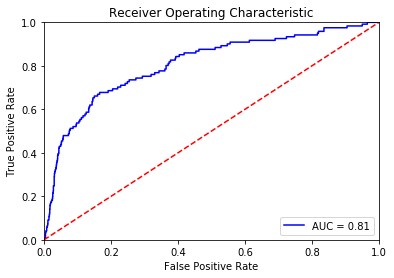

[[1432  220]
 [  48   73]]


 > Epoch 4
Selected Features: 
Attr1, Attr2, Attr4, Attr6, Attr10, Attr12, Attr22, Attr24, Attr25, Attr26, Attr29, Attr33, Attr35, Attr36, Attr38, Attr39, Attr40, Attr46, Attr56, Attr63, 
Class 0: (5500, 65)
Class 1: (410, 65)
Class 0: (3845,)
Class 1: (3845,)
Training complete. Number of epochs: 2180
[-0.18116756  0.44284969  0.06395606 -0.04083381 -0.19092149  0.04953888
 -0.20039999  0.03085359 -0.34370205 -0.3664982  -0.04527369  0.53612263
 -0.35653263  0.11531121 -0.26793749 -0.19289093  0.21942814 -0.35259738
 -0.11411675 -0.49967339]

 Custom LR Results:
ROC AUC score: 0.8451379998975881
ROC AUC score: 0.8451379998975881


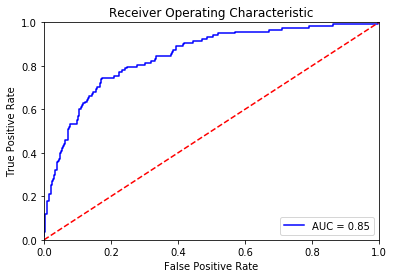

[[1449  206]
 [  43   75]]

 SkLearn LR Results:
ROC AUC score: 0.8585693071841878
ROC AUC score: 0.8585693071841878


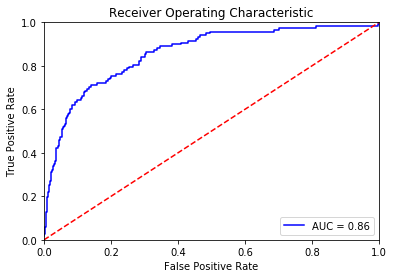

[[1424  231]
 [  34   84]]


 > Epoch 5
Selected Features: 
Attr2, Attr3, Attr7, Attr19, Attr22, Attr25, Attr26, Attr29, Attr31, Attr33, Attr35, Attr38, Attr40, Attr46, Attr48, Attr50, Attr51, Attr56, Attr58, Attr63, 
Class 0: (5500, 65)
Class 1: (410, 65)
Class 0: (3856,)
Class 1: (3856,)
Training complete. Number of epochs: 2642
[ 0.46077228 -0.26681305 -0.08302201  0.00799657 -0.0664573  -0.39252972
 -0.26033008 -0.12539238  0.04500548  0.56135531 -0.45226177 -0.34224635
  0.31748027 -0.40268106 -0.00736525  0.13625335  0.48440576 -0.07787951
  0.1393875  -0.50677018]

 Custom LR Results:
ROC AUC score: 0.8590552443463664
ROC AUC score: 0.8590552443463664


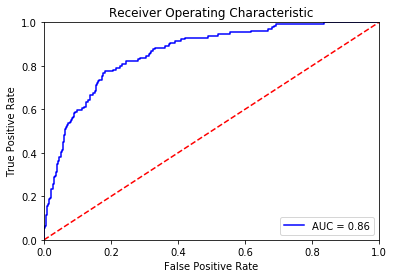

[[1430  214]
 [  47   82]]

 SkLearn LR Results:
ROC AUC score: 0.8736820762368207
ROC AUC score: 0.8736820762368207


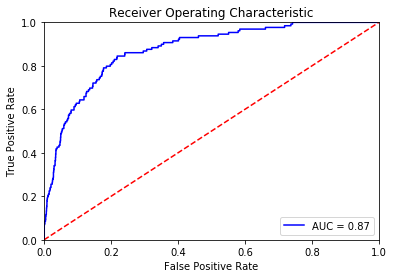

[[1422  222]
 [  40   89]]


 > Epoch 6
Selected Features: 
Attr1, Attr3, Attr4, Attr7, Attr9, Attr10, Attr11, Attr14, Attr16, Attr18, Attr21, Attr22, Attr25, Attr26, Attr29, Attr33, Attr35, Attr48, Attr50, Attr63, 
Class 0: (5500, 65)
Class 1: (410, 65)
Class 0: (3852,)
Class 1: (3852,)
Training complete. Number of epochs: 10000
[-0.10273921 -0.81112556 -0.06364453 -0.09779753  0.03280059 -0.39112178
 -0.0147711  -0.09780765  0.08187218 -0.10152569  0.19476721 -0.05713181
 -0.32914205 -0.26697842 -0.04543407  0.39149456 -1.36872947  0.21152643
  0.07748979 -0.37426328]

 Custom LR Results:
ROC AUC score: 0.8605
ROC AUC score: 0.8605


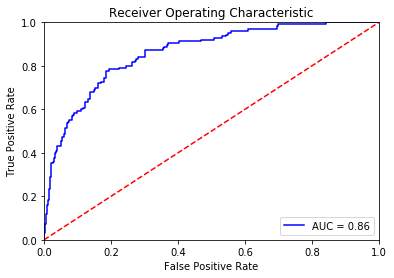

[[1508  140]
 [  54   71]]

 SkLearn LR Results:
ROC AUC score: 0.8414757281553398
ROC AUC score: 0.8414757281553398


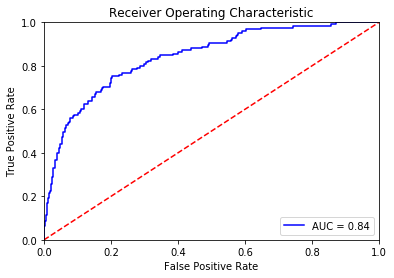

[[1458  190]
 [  50   75]]


 > Epoch 7
Selected Features: 
Attr3, Attr7, Attr9, Attr10, Attr14, Attr17, Attr18, Attr22, Attr25, Attr29, Attr33, Attr35, Attr38, Attr40, Attr46, Attr48, Attr50, Attr56, Attr57, Attr63, 
Class 0: (5500, 65)
Class 1: (410, 65)
Class 0: (3869,)
Class 1: (3869,)
Training complete. Number of epochs: 3602
[-0.46319237 -0.11447816  0.19223865 -0.26670279 -0.11448409 -0.0442824
 -0.11666172 -0.0813232  -0.49303669  0.06689269  0.75396863 -0.58690194
 -0.24964122  0.64717418 -0.69225825  0.01099801  0.12983045 -0.39647431
 -0.04208065 -0.72113829]

 Custom LR Results:
ROC AUC score: 0.8287363666980424
ROC AUC score: 0.8287363666980424


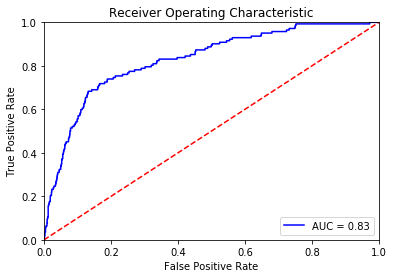

[[1420  211]
 [  47   95]]

 SkLearn LR Results:
ROC AUC score: 0.842201276327493
ROC AUC score: 0.842201276327493


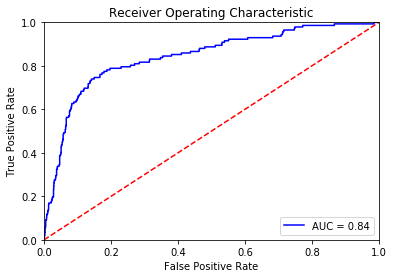

[[1391  240]
 [  37  105]]


 > Epoch 8
Selected Features: 
Attr10, Attr11, Attr13, Attr14, Attr16, Attr18, Attr22, Attr25, Attr26, Attr29, Attr31, Attr33, Attr35, Attr38, Attr39, Attr40, Attr46, Attr48, Attr56, Attr63, 
Class 0: (5500, 65)
Class 1: (410, 65)
Class 0: (3848,)
Class 1: (3848,)
Training complete. Number of epochs: 3156
[-0.37695731 -0.07057186 -0.03076118 -0.11516833 -0.02275789 -0.11502883
 -0.07421101 -0.5478091  -0.06980794  0.12678581  0.04780272  0.72740017
 -0.51638402 -0.48146467 -0.39553243  0.68987677 -0.66624621 -0.011532
 -0.21583983 -0.65769556]

 Custom LR Results:
ROC AUC score: 0.8405939207171873
ROC AUC score: 0.8405939207171873


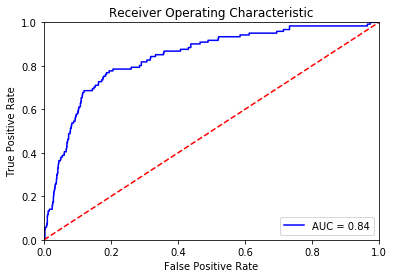

[[1464  188]
 [  42   79]]

 SkLearn LR Results:
ROC AUC score: 0.8454140235727292
ROC AUC score: 0.8454140235727292


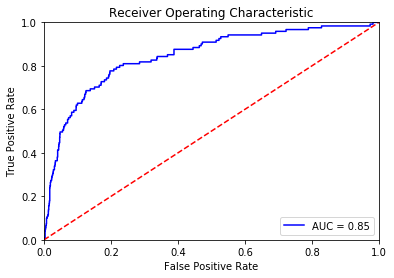

[[1427  225]
 [  38   83]]


 > Epoch 9
Selected Features: 
Attr1, Attr2, Attr3, Attr10, Attr12, Attr19, Attr22, Attr25, Attr26, Attr29, Attr31, Attr33, Attr35, Attr38, Attr39, Attr40, Attr46, Attr48, Attr51, Attr63, 
Class 0: (5500, 65)
Class 1: (410, 65)
Class 0: (3860,)
Class 1: (3860,)
Training complete. Number of epochs: 4134
[-0.11849508  0.48884442 -0.36455789  0.10389361  0.18143357 -0.06306904
 -0.08124395 -0.32195959 -0.31859872 -0.0976753   0.0860432   0.75355011
 -0.65136048 -0.08240396 -0.48428363  0.58136961 -0.59465921 -0.0104145
  0.57240337 -0.68776396]

 Custom LR Results:
ROC AUC score: 0.8483128553090042
ROC AUC score: 0.8483128553090042


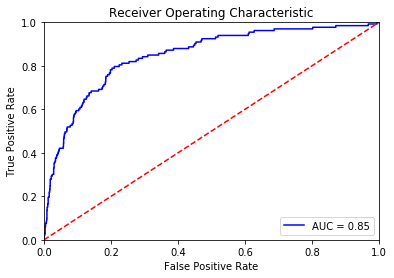

[[1442  198]
 [  47   86]]

 SkLearn LR Results:
ROC AUC score: 0.8493375206308453
ROC AUC score: 0.8493375206308453


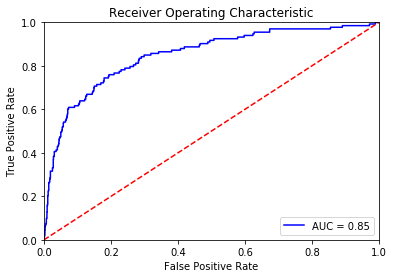

[[1416  224]
 [  44   89]]

 >>> Custom LR Average Score: 0.82281498186133

 >>> SKLearn LR Average Score: 0.8427203492427775


In [34]:
slr = LogisticRegression()
clr = CustomLogisticRegression()

for i in range(1,6):
    
    print("\n\n *****************************")
    print("*****  Year {}  *****".format(i))
    print("*****************************\n")
    
    data = load_data('data/{}year.arff'.format(i))
    
    input = data

    #Format classifications as type float
    input['class'] = input['class'].apply(lambda x: float(x))

    #Replace null values with column mean
    input = input.fillna(input.mean())
    
    clr_total = 0;
    slr_total = 0;
    epochs = 10;

    for i in range(0,epochs):
        
        print("\n\n > Epoch {}".format(i))
        
        #Split between training and testing data
        X_train, X_test, y_train, y_test = train_test_split(input.loc[:,input.columns != 'class'], input['class'], test_size=0.3)

        #Select best features using Recursive Feature Selection
        transformed_input, tranformed_test = feature_selection(X_train, y_train.ravel())

        #Generate synthetic samples
        X_train_res, y_train_res = smote(transformed_input, y_train)

        # Train models
        clr.fit(X_train_res,y_train_res)
        slr.fit(X_train_res,y_train_res)

        # Use models to predict test data
        predicted = clr.predict_proba(tranformed_test)
        sklearn_predicted = slr.predict_proba(tranformed_test)

        # Custom LR results
        print("\n Custom LR Results:")
        clr_total += calc_results(predicted, y_test)

        #SkLearn LR Results
        print("\n SkLearn LR Results:")
        slr_total += calc_results(sklearn_predicted[:,1], y_test)
        
    print("\n >>> Custom LR Average Score: {}".format(clr_total/epochs))
    print("\n >>> SKLearn LR Average Score: {}".format(slr_total/epochs))